# A7 (30 Marks + up to 5 Bonus Marks)
---
**Focus**: CUDA(D, E) - Thread synchronization

© Dr. Abdallah Mohamed

In this assignment, you will write code to compute a convolution of an input image with a filter (also known as a convolution kernel [1]). In this process, the convolution process takes as input two matrices, the image A and the filter F, and outputs a matrix, the convolved image H. The example below shows result of applying a blur filter to an image of the Okanagan valley:

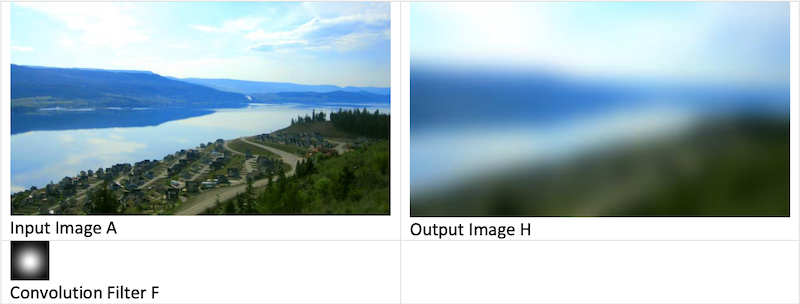

[1] This term does not refer to the CUDA kernel function, but instead to a matrix used during the convolution operation.

To illustrate the convolution operation, consider a matrix of floating-point numbers, where each cell stores a value reflecting the intensity of an image pixel ranging from 0 for black to 1 for white. For example:

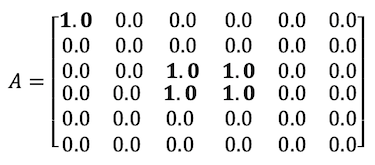

And assume we are using the convolution filter below (which is a matrix usually with smaller size):

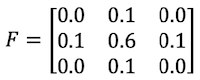

The convolution of A with F would be

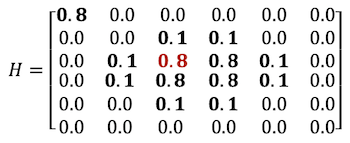

The algorithm for computing the output image H includes the following steps:

1. For each pixel of A located at ( i , j ), consider a submatrix S centered at ( i , j ) with the same size as the kernel F. For example, for ( i , j ) = (2 , 2), i.e. the red value in A, the resulting submatrix includes the values highlighted in yellow in A.

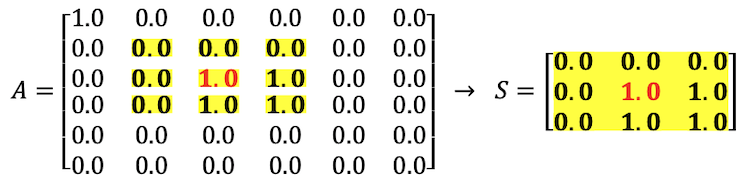

2. Compute the element-wise sum-of-products of S and F, i.e. ,

  𝑣𝑎𝑙𝑢𝑒𝑓𝑜𝑟(𝑖,𝑗)= (0.0+0.0+0.0)+(0.0+0.6+0.1)+(0.0+0.1+0.0)=0.8

3. Store value in H( i , j ). For the above example, H( 2 , 2 ) = 0.8

For pixels at the boundary, you could replicate the values at the matrix edges to fill in the cells in S that represent the out-of-bound pixels. For example, the submatrix S for the pixel A(0,0) would be as follows (replicated values are written in green):

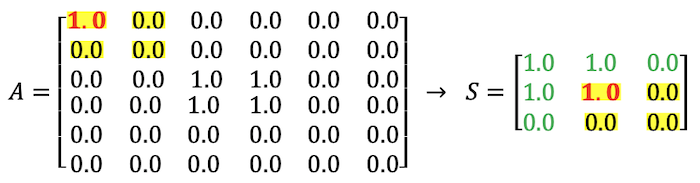

There are other options for the boundary pixels, e.g., to set the out-of-boundary pixels to 0.0.

In this assignment, the input image A is a 32-bit color image represented using RGBA format (e.g., the Okanagan valley image above). That is, every pixel in the image is 32-bits: 8-bits to represent the Red component, 8-bits for Green, 8-bits for Blue, and 8-bits for the Alpha channel. The filter F is a square
floating-point matrix representing a blur operator (similar to the filter given in the examples above). The filter is stored as an image (e.g., filter_blur_21.bmp which is a 21-pixel wide filter)[2].

You are provided with the serial implementation of the convolution operation. The provided code uses the open-source EasyBMP [3] for reading and writing a BMP image. You are also provided with extra functions to convert an image to a format suitable for our program. In this format, each matrix element (i.e., pixel) is represented as uchar4 CUDA type, which is a 4-byte type that has four components: x, y, z, and w, each represented in 1 byte (unsigned char). This type is perfectly suitable to represent a RGBA image pixel where each uchar4 component can be used to represent on image channel (R,G,B,A).

[2] Note that different filters produce different effects e.g., blur, sharpen, edge-detect, etc. See https://en.wikipedia.org/wiki/Kernel_%28image_processing%29 for an example of different filters.

[3] The full EasyBMP library and samples can be downloaded from easybmp.sourceforge.net. You don’t need the full library as the required files are already attached to this assignment.

## Getting Started

1. Run the project setup cell (as you did in assignment A6). This pulls all the dependencies you will need for this project. Remember to rerun this cell anytime Google Colab allocates you a new instance.

2. Then, read the below convolution code and understand its operation. Detailed comments are provided in order to explain how the code works. There is no need to read the code in the other files.

## Marking Guide

- **[+26]** Provide CUDA implementation of `convolution_32bits()` and the helper function `convolution_8bits()`
  - +8 marks for the host code
  - +4 marks for an additional function `convolution_8bits_parallel()`
  - +10 marks for an additional function `convolution_32bits_parallel()` as
follows:
    - +3 for splitting the image into four channels
    - +3 for proper threads synchronization
    - +4 for applying the 8bit convolution to each channel.
  - +4 marks for checking for errors from CUDA API calls and from Kernel Launch.

- **[+4]** Time your code and report the speedup of using your CUDA implementation vs. the provided serial implementation.
  - +1 mark for reporting the serial time
  - +2 marks for reporting the parallel time and speedup
  - +1 mark for including the output image from the parallel launch (even if it has errors) Add the timing notes and the output image from running your code in an MS Word.

## Assignment Bonus

Up to **+5 bonus marks** for creating two more filters, testing them using your code, and reporting the resulting images. Note that the code assumes we use a square filter with a width of odd number of pixels.

## What to Submit

- Copy and paste the output of the below Convolution Code cell into a convolution.cu file (this can just be a renamed text file). The convolution code should have two additional functions: `convolution_8bits_parallel()` and `convolution_32bits_parallel()`
- An MS Word file that includes the output image and the time comparison (speedups): serial vs. parallel.

## Notebook Setup

**Remember to re-run the following code block anytime you reconnect/connect/restart your Notebook!**

In [ ]:
# Download/Install/Enable NVCC4Jupyter
!pip install git+https://github.com/engasa/nvcc4jupyter.git
%load_ext nvcc_plugin

# Download/UnZip EasyBMP
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1PJo0QiNI9_Vrb3zH1UC-Np2U1uVSeusr" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1PJo0QiNI9_Vrb3zH1UC-Np2U1uVSeusr" -o EasyBMP.zip
!unzip EasyBMP.zip -d ./src
!echo Finished!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/engasa/nvcc4jupyter.git to /tmp/pip-req-build-vkvt7m5j
  Running command git clone -q https://github.com/engasa/nvcc4jupyter.git /tmp/pip-req-build-vkvt7m5j
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4407 sha256=a34dd49cf1366c5261fbc765405dedb959d6ccdcec5c080182b3c0b836d88de9
  Stored in directory: /tmp/pip-ephem-wheel-cache-740ihjrb/wheels/d2/a3/04/ef659d715dcdd196d998813ca085af3cab3df66f4bb27576b5
Successfully built NVCCPlugin
created output directory at /content/src
Out bin /content/result.out
awk: cannot open ./cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1153k  100 1153k    0     0  1727k    

## Convolution Code

In [ ]:
%%cuda --name convolution.cu --compile true

#include "EasyBMP.h"
#include "EasyBMP.cu"
#include <math.h>
#include <time.h>
#include <cuda_runtime.h>	// for uchar4 struct

#define MIN(x,y) (  (y) ^ (((x) ^ (y)) & -((x) < (y))) )
#define MAX(x,y) (  (x) ^ (((x) ^ (y)) & -((x) < (y))) )

//****************************************************************************************************************
// PARALLEL FUNCTIONS
//****************************************************************************************************************
	/*
	TODO: 	Provide CUDA implementation for parallelizing the two SERIAL functions: convolution_8bits and convolution_32Bits
			Make sure to check for errors from CUDA API calls and from Kernel Launch.
			Also, time your parallel code and compute the speed-up.
	*/


//****************************************************************************************************************
// SERIAL FUNCTIONS
//****************************************************************************************************************

//	This function applies the convolution kernel (denoted by filter) to every pixel of the input image (image_in)
//	constraints: image_in and image_out have 8-bit pixels (e.g., grayscale images, only one color channel, etc)

void convolution_8bits(const unsigned char* const image_in, unsigned char* const image_out, const int height, const int width, const float *filter, const int filter_width){
	//only filters with width = odd_number are allowed
	if (filter_width % 2 == 0){
		//you don't have to print anything when running on kernel.
		fprintf(stderr,"Filters with even width are not supported yet. Program terminated!\n");
		exit(1);
	}
	//Apply the filter to every image pixel (col, row)
	for (int row = 0; row < height; ++row)
		for (int col = 0; col < width; ++col) {
			float sum = 0.0f;
			//Having the filter centered at image pixel (col,row), multiply every filter pixel by the corresponding image pixel, and find the sum
			for (int row_f = -filter_width / 2; row_f <= filter_width / 2; ++row_f)
				for (int col_f = -filter_width / 2; col_f <= filter_width / 2; ++col_f) {
					//get the value of the image pixel for the current filter pixel. If out of boundary, use boundary pixels
					int row_i = MIN(MAX(row + row_f, 0), (height - 1));
					int col_i = MIN(MAX(col + col_f, 0), (width - 1));
					float pxl_image = image_in[row_i * width + col_i];
					//get the value for the current filter
					float pxl_filter = filter[(row_f + filter_width / 2) * filter_width + col_f + filter_width / 2];
					//multiply image_pixel by filter_pixel and add to final value of the image pixel
					sum += pxl_image * pxl_filter;
				}
			//final value of image pixel(col, row) = the sum of every filter pixel multiplied by the corresponding image pixels around image pixel(col,row)
			image_out[row * width + col] = sum;
		}
}

//	This function applies the convolution kernel (denoted by filter) to every pixel of the input image (image_in)
//	Constraints:- Both image_in and image_out are in RGBA format (32-bit pixels as uchar4)
//				- Filter is a square matrix (float) and its width is odd number. The sum of all its values is 1 (normalized)

void convolution_32bits( const uchar4* const image_in, uchar4 *const image_out, int height, int width, const float* const filter, const int filter_width){
	//break the input image (uchar4 matrix) into 4 channels (four char matrices): Red, Green, Blue, and Alpha
	unsigned char *R_in = new unsigned char[width * height];
	unsigned char *G_in = new unsigned char[width * height];
	unsigned char *B_in = new unsigned char[width * height];
	unsigned char *A_in = new unsigned char[width * height];
	for (int i = 0; i < width * height; ++i) {	//break each pixel in input image
		uchar4 pxl = image_in[i];
		R_in[i] = pxl.x;
		G_in[i] = pxl.y;
		B_in[i] = pxl.z;
		A_in[i] = pxl.w;
	}

	//perform 8-bit convolution for each 8-bit image channel
	unsigned char *R_out = new unsigned char[width * height];
	convolution_8bits(R_in, R_out, height, width, filter, filter_width);

	unsigned char *G_out = new unsigned char[width * height];
	convolution_8bits(G_in, G_out, height, width, filter, filter_width);

	unsigned char *B_out = new unsigned char[width * height];
	convolution_8bits(B_in, B_out, height, width, filter, filter_width);

	unsigned char *A_out = new unsigned char[width * height];
	convolution_8bits(A_in, A_out, height, width, filter, filter_width);

	//merge the four channels into one output image of type uchar4
	for (size_t i = 0; i < height * width; ++i)
		image_out[i] = make_uchar4(R_out[i], G_out[i], B_out[i], A_out[i]);
}

//**************************************************************
//No need to parallelize any of the functions below this comment
//**************************************************************

//This function reads a BMP image using the EasyBMP library and returns a 1D array representing the RGBA values of the image pixels
//image_out->x is Red, image_out->y is Green, image_out->z is Blue, image_out->w is Alpha
//how to use:	1- in the calling function, declare these variables:	uchar4* img = NULL;	int width = 0, height = 0;
//				2- then call this function								readBMP(filename, &img, &width, &height);
void readBMP(const char* FileName, uchar4 **image_out, int* width, int* height){
	BMP img;
	img.ReadFromFile(FileName);
	*width = img.TellWidth();
	*height = img.TellHeight();
	uchar4 *const img_uchar4 = (uchar4*)malloc(*width * *height * sizeof(int));
	// save each pixel to image_out as uchar4 in row-major format
	for (int row = 0; row <*height; row++)
		for (int col = 0; col < *width; col++)
			img_uchar4[col + row * *width] = make_uchar4(img(col, row)->Red, img(col, row)->Green, img(col, row)->Blue, img(col, row)->Alpha);	//use row-major
	*image_out = img_uchar4;
}

//This function writes a BMP image using the EasyBMP library
//how to use: in the calling function, call		writeBMP(destination_filename, source_image_array, width, height);
void writeBMP(const char* FileName, uchar4 *image, int width, int height){
	BMP output;
	output.SetSize(width, height);
	output.SetBitDepth(24);
	// save each pixel to the output image
	for (int row = 0; row < height; row++){		//for each row
		for (int col = 0; col <  width; col++){	//for each col
			uchar4 rgba = image[col + row * width];
			output(col, row)->Red = rgba.x;
			output(col, row)->Green = rgba.y;
			output(col, row)->Blue = rgba.z;
			output(col, row)->Alpha = rgba.w;
		}
	}
	output.WriteToFile(FileName);

}

//Normalize image filter (sum of all values should be 1)
// the filter is a 2D float array
void normalizeFilter(float* filter, int width){
	//find the sum
	float sum = 0;
	for (int i = 0; i < width*width; i++)
		sum += filter[i];
	//normalize
	for (int i = 0; i < width*width; i++)
		filter[i] /= sum;
}

//this Function reads the convolution-filter image
//Contrasting: Filter is 32 bit RGPA image. The filter must be sqaure. Filter width must be an odd number
float* readFilter(const char* filter_image_name, int* filter_width){
	int filterHeight;	//for testing that height = width
	//read filter image as 32 bit RGPA bitmap and check the constraints (square, odd width)
	uchar4* filterImageUchar;
	readBMP(filter_image_name, &filterImageUchar, filter_width, &filterHeight);
	if (*filter_width != filterHeight || *filter_width % 2 == 0){
		fprintf(stderr, "Non-square filters or filters with even width are not supported yet. Program terminated!\n");
		exit(1);
	}
	//convert every pixel to a float number representing its grayscale intensity. Formula used is 0.21 R + 0.72 G + 0.07 B
	float* filter = (float*)malloc(*filter_width * *filter_width * sizeof(float));
	for (int i = 0; i < *filter_width * *filter_width; i++){
		uchar4 element = filterImageUchar[i];
		filter[i] = 0.21 * element.x + 0.72 * element.y + 0.07 * element.z;
	}
	//Normalization makes sure that the sum of all values in the filter is 1
	normalizeFilter(filter, *filter_width);
	//return result
	return filter;
}

void checkForGPU() {
    // This code attempts to check if a GPU has been allocated
    // Colab notebooks technically have access to NVCC and will compile and
    // execute CPU/Host code, however, GPU/Device code will silently fail.
    // To prevent such situations, this code will warn the user.
    int count;
    cudaGetDeviceCount(&count);
    if (count <= 0 || count > 100) {
        printf("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n");
        printf("->WARNING<-: NO GPU DETECTED ON THIS COLLABORATE INSTANCE.\n");
        printf("IF YOU ARE ATTEMPTING TO RUN GPU-BASED CUDA CODE, YOU SHOULD CHANGE THE RUNTIME TYPE!\n");
        printf("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n");
    }
}

void serial(){
	int filter_width;
	const char* filter_image_name = "./src/filter_blur_21.bmp";	//filter width = 21 pixels
	const char* image_in_name = "./src/okanagan.bmp";
	const char* image_out_name = "okanagan_blur.bmp";

	//load filter
	float* filter = readFilter(filter_image_name, &filter_width);
	printf("Filter loaded...\n");

	//load input image
	int width, height;
	uchar4* image_in;
	readBMP(image_in_name, &image_in, &width, &height);	//image_in will have all pixel information, each pixel as uchar4
	printf("Input image loaded...\n");

	//apply convolution filter to input image
	uchar4* image_out = (uchar4*)malloc(width*height*sizeof(uchar4));	//reserve space in the memory for the output image
	printf("Applying the convolution filter...\n");
	int t = clock();
	convolution_32bits(image_in, image_out, height, width, filter, filter_width);	//filter applied to image_in, results saved in image_out
	t = (clock() - t) * 1000 / CLOCKS_PER_SEC;
	printf("Convolution filter applied. Time taken: %d.%d seconds\n", t / 1000, t % 1000);

	//save results to output image
	writeBMP(image_out_name, image_out, width, height);
	printf("Output image saved.\nProgram finished!\n");
}

void parallel(){
	//launch your cuda kernel from here
}

//MAIN: testing convolution with a blur filter
int main(){
  checkForGPU();
	serial();
	//parallel();
}

/content/src/EasyBMP.cu(994): warning: variable "ZeroWORD" was declared but never referenced


Filter loaded...
Input image loaded...
Applying the convolution filter...
Convolution filter applied. Time taken: 12.906 seconds
Output image saved.
Program finished!



## Show Image

To display the created test.bmp image, run the code block below

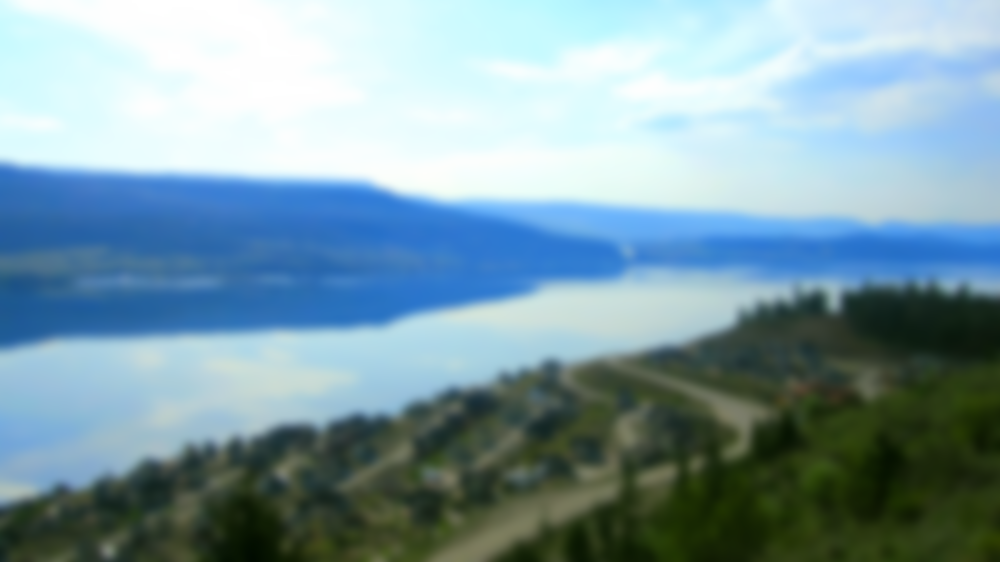

In [ ]:
from PIL import Image
Image.open("okanagan_blur.bmp")

## Submission Instructions

For this assignment, you need to do the following:

1. Copy and paste the Convolution code block into a text file on your local machine and name it convolution.cu

2. Download all the images generated by your CUDA Convolution code (this can be done by right-clicking/saving the displayed by the above code block). Paste all of these into a Word Document. DO NOT paste your convolution code into the Word document.

3. Compare the time between your parallel convolution and the serial convolution. Note this comparison in the Word document with your convolved images.

3. Compress all your files (the source code and the Word document) into one zip file and give it a name that matches your ID (e.g., 1234567.zip).

2. Submit the zipped file to Canvas.

Note that you can resubmit an assignment, but the new submission overwrites the old submission and receives a new timestamp.